In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import skipgrams

In [2]:
url = 'https://raw.githubusercontent.com/Factha-Bangkit-Capstone/machine-learning-factha/main/balanced_dataset.csv'

dataset = pd.read_csv(url)
dataset.head()

,berita,tagging
0,Pemkot Surabaya terus merazia permen dot yang ...,Hoax
1,Malam peringatan ulang tahun ke-90 Kolese Kani...,Hoax
2,Mungkin Anda pernah membaca artikel atau sekad...,Valid
3,Konsulat Jenderal Republik Indonesia di Davao ...,Valid
4,"Akhir-akhir ini, beredar pemberitaan yang meny...",Valid


In [3]:
dataset.tail()

,berita,tagging
925,Detasemen Khusus (Densus) 88 Anti Teror Mabes ...,Valid
926,Beredar foto peserta Aksi 212 Jilid Dua di med...,Valid
927,"""KANKER BUKAN PENYAKIT, TETAPI BISNIS MILIARAN...",Hoax
928,B737 MAX 8 Lion Air dengan registrasi PK-AXC i...,Valid
929,VIVA Lima Pengawas Pemilihan Umum Kelurahan/D...,Valid


In [4]:
dataset.shape

(930, 2)

In [5]:
dataset.columns

Index(['berita', 'tagging'], dtype='object')

In [6]:
df_data = dataset.copy()
df_data['tagging'].value_counts()

tagging
Hoax     465
Valid    465
Name: count, dtype: int64

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   berita   930 non-null    object
 1   tagging  930 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


<Axes: xlabel='tagging', ylabel='count'>

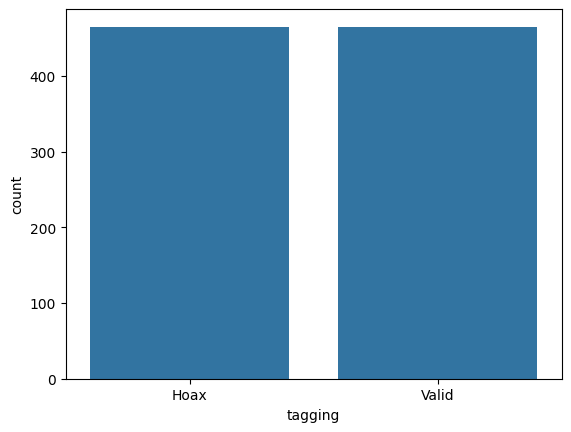

In [8]:
import seaborn as sns

sns.countplot(data=df_data, x='tagging', order=df_data['tagging'].value_counts().index)

In [9]:
df_data = df_data.replace({'tagging': {'Valid': '0', 'Hoax': '1'}})
df_data.head()

,berita,tagging
0,Pemkot Surabaya terus merazia permen dot yang ...,1
1,Malam peringatan ulang tahun ke-90 Kolese Kani...,1
2,Mungkin Anda pernah membaca artikel atau sekad...,0
3,Konsulat Jenderal Republik Indonesia di Davao ...,0
4,"Akhir-akhir ini, beredar pemberitaan yang meny...",0


In [10]:
valid = df_data['tagging'].value_counts()[0]
hoax = df_data['tagging'].value_counts()[1]

print(f'Tagging value counts for valid = {valid}')
print(f'Tagging value counts for hoax = {hoax}')

Tagging value counts for valid = 465
Tagging value counts for hoax = 465


In [11]:
# Download NLTK wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Define stopwords
stopwords_list = ["yang", "di", "dan", "ini", "dari", "itu", "dengan", "tersebut", "dalam", "untuk", "ada", "pada", "juga", "akan"]

# Function to clean text
def text_clean(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    punkt = set(string.punctuation)
    text = ''.join([ch for ch in text if ch not in punkt])
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Function to remove stopwords
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Function to lemmatize text
def lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]

# Preprocess text function
def preprocess_text(text, stopwords, tokenizer):
    text = text_clean(text)
    text = remove_stopwords(text, stopwords)
    text = ' '.join(lemmatize(text))
    return sequences

# Preprocess dataset
df_data['berita'] = df_data['berita'].apply(text_clean)
df_data['berita'] = df_data['berita'].apply(lambda x: remove_stopwords(x, stopwords_list))
df_data['berita'] = df_data['berita'].apply(lambda x: ' '.join(lemmatize(x)))

# Display the cleaned data
print(df_data.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              berita tagging
0  pemkot surabaya terus merazia permen dot terin...       1
1  malam peringatan ulang tahun ke kolese kanisiu...       1
2  mungkin anda pernah membaca artikel atau sekad...       0
3  konsulat jenderal republik indonesia davao cit...       0
4  akhir akhir beredar pemberitaan menyatakan ken...       0


In [12]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_data['berita'])
sequences = tokenizer.texts_to_sequences(df_data['berita'])

# Display the tokenized data
print("\nSequences:")
for i, seq in enumerate(sequences):
    print(f"Original Text: '{df_data['berita'][i]}'")
    print(f"Converted Sequence: {seq}")

Output hidden; open in https://colab.research.google.com to view.

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure equal length
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, padding='post', maxlen=max_len)

# Ensure y is in integer format
y = df_data['tagging'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (744, 1076)
X_test shape: (186, 1076)
y_train shape: (744,)
y_test shape: (186,)


In [14]:
import tensorflow as tf

# Jumlah kata unik + 1 untuk zero padding
vocab_size = len(tokenizer.word_index) + 1

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=11)),
    tf.keras.layers.Dropout(rate=.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
], name='lstm_model')

lstm_model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics = ['accuracy']
)

lstm_model.summary()

Model: "lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1076, 128)         1735296   
                                                                 
 bidirectional (Bidirection  (None, 22)                12320     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 flatten (Flatten)           (None, 22)                0         
                                                                 
 dense (Dense)               (None, 10)                230       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

In [15]:
# import tensorflow as tf

# vocab_size = len(tokenizer.word_index) + 1

# # Define regularization strength
# regularization_strength = 0.01

# lstm_model = tf.keras.models.Sequential([
#     tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
#         units=12,
#         kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)
#     )),
#     tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(
#         units=10,
#         activation='relu',
#         kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)
#     ),
#     tf.keras.layers.Dropout(rate=0.2),
#     tf.keras.layers.Dense(
#         units=1,
#         activation='sigmoid',
#         kernel_regularizer=tf.keras.regularizers.l2(regularization_strength)
#     )
# ], name='lstm_model')

# lstm_model.compile(
#     loss = tf.keras.losses.Huber(),
#     optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
#     metrics = ['accuracy']
# )

# lstm_model.summary()


In [16]:
history = lstm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
24/24 [==============================] - 23s 459ms/step - loss: 0.1251 - accuracy: 0.5108 - val_loss: 0.1250 - val_accuracy: 0.5054
Epoch 2/100
24/24 [==============================] - 3s 133ms/step - loss: 0.1252 - accuracy: 0.4960 - val_loss: 0.1249 - val_accuracy: 0.4946
Epoch 3/100
24/24 [==============================] - 3s 115ms/step - loss: 0.1248 - accuracy: 0.5269 - val_loss: 0.1248 - val_accuracy: 0.4839
Epoch 4/100
24/24 [==============================] - 3s 127ms/step - loss: 0.1247 - accuracy: 0.5228 - val_loss: 0.1246 - val_accuracy: 0.5000
Epoch 5/100
24/24 [==============================] - 3s 145ms/step - loss: 0.1247 - accuracy: 0.5349 - val_loss: 0.1245 - val_accuracy: 0.5161
Epoch 6/100
24/24 [==============================] - 3s 107ms/step - loss: 0.1245 - accuracy: 0.5672 - val_loss: 0.1244 - val_accuracy: 0.5215
Epoch 7/100
24/24 [==============================] - 3s 118ms/step - loss: 0.1243 - accuracy: 0.5833 - val_loss: 0.1243 - val_accuracy: 0.526

In [17]:
# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

6/6 [==============================] - 0s 26ms/step - loss: 0.0752 - accuracy: 0.8065
Test Accuracy: 0.8064516186714172


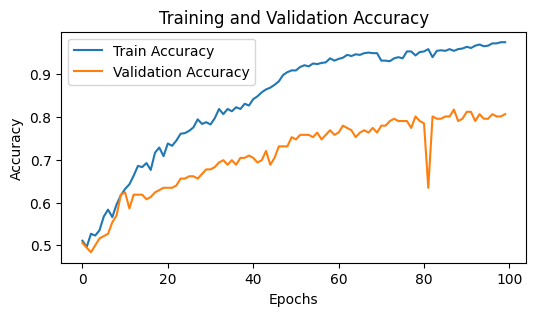

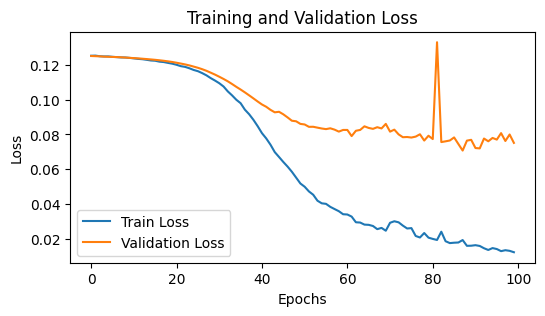

In [18]:
# Plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [19]:
# Save the model
lstm_model.save('hoax_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model('hoax_detection_model.h5')

In [21]:
# Make predictions
predictions = loaded_model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

6/6 [==============================] - 1s 39ms/step


In [22]:
# Display first 10 predictions
print("First 10 Predic :", predictions[:30].flatten())
print("First 10 Actual :", y_test[:30].values)

First 10 Predic : [0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0]
First 10 Actual : [0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0]


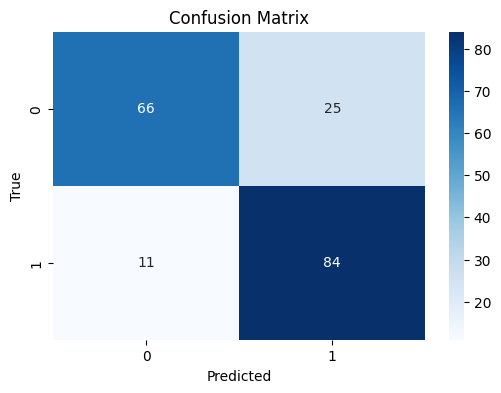

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
# Convert predicted probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, binary_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Classification Report
class_report = classification_report(y_test, binary_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        91
           1       0.77      0.88      0.82        95

    accuracy                           0.81       186
   macro avg       0.81      0.80      0.80       186
weighted avg       0.81      0.81      0.81       186



In [25]:
# Function to predict and display results for given test indices
def predict_and_display(indices, X_test, y_test, model):
    for idx in indices:
        if idx < 0 or idx >= len(X_test):
            print(f"Index {idx} is out of bounds.")
            continue
        prediction = model.predict(np.array([X_test[idx]]))
        predicted_label = 'Hoax' if prediction >= 0.5 else 'Valid'
        actual_label = 'Hoax' if y_test.iloc[idx] == 1 else 'Valid'
        valid_prob = 1 - prediction[0][0]
        hoax_prob = prediction[0][0]
        print(f"Index: {idx}")
        print(f"Actual Label: {actual_label}")
        print(f"Predicted Label: {predicted_label}")
        print(f"Valid Probability: {valid_prob * 100:.2f}%")
        print(f"Hoax Probability: {hoax_prob * 100:.2f}%\n")

# Example usage
indices_to_predict = [0, 5, 10, 20, 30, 4, 9]  # Replace with your desired test indices
predict_and_display(indices_to_predict, X_test, y_test, loaded_model)

1/1 [==============================] - 0s 46ms/step
Index: 0
Actual Label: Valid
Predicted Label: Valid
Valid Probability: 97.95%
Hoax Probability: 2.05%

1/1 [==============================] - 0s 37ms/step
Index: 5
Actual Label: Valid
Predicted Label: Hoax
Valid Probability: 9.15%
Hoax Probability: 90.85%

1/1 [==============================] - 0s 39ms/step
Index: 10
Actual Label: Valid
Predicted Label: Valid
Valid Probability: 97.76%
Hoax Probability: 2.24%

1/1 [==============================] - 0s 44ms/step
Index: 20
Actual Label: Valid
Predicted Label: Valid
Valid Probability: 97.00%
Hoax Probability: 3.00%

1/1 [==============================] - 0s 38ms/step
Index: 30
Actual Label: Valid
Predicted Label: Valid
Valid Probability: 97.13%
Hoax Probability: 2.87%

1/1 [==============================] - 0s 39ms/step
Index: 4
Actual Label: Valid
Predicted Label: Hoax
Valid Probability: 16.07%
Hoax Probability: 83.93%

1/1 [==============================] - 0s 38ms/step
Index: 9
Actual 

1/1 [==============================] - 0s 36ms/step
Predicted Label Frequencies (%):
Predicted Label
Valid    57.142857
Hoax     42.857143
Name: proportion, dtype: float64

Actual Label Frequencies (%):
Actual Label
Valid    100.0
Name: proportion, dtype: float64


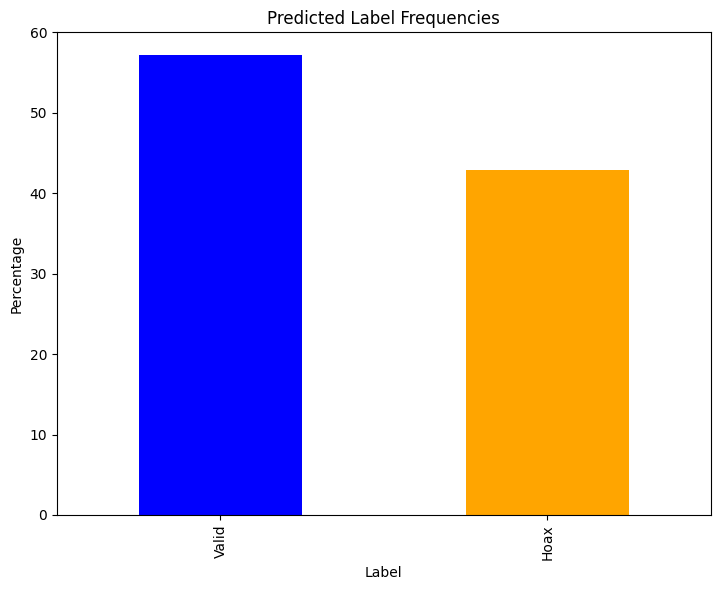

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def predict_and_collect_results(indices, X_test, y_test, model):
    results = []

    for idx in indices:
        if idx < 0 or idx >= len(X_test):
            print(f"Index {idx} is out of bounds.")
            continue
        prediction = model.predict(np.array([X_test[idx]]))
        predicted_label = 'Hoax' if prediction >= 0.5 else 'Valid'
        actual_label = 'Hoax' if y_test.iloc[idx] == 1 else 'Valid'
        results.append({
            'Index': idx,
            'Predicted Label': predicted_label,
            'Actual Label': actual_label,
            'Valid Probability': 1 - prediction[0][0],
            'Hoax Probability': prediction[0][0]
        })

    return pd.DataFrame(results)

def display_frequencies(results_df):
    predicted_counts = results_df['Predicted Label'].value_counts(normalize=True) * 100
    actual_counts = results_df['Actual Label'].value_counts(normalize=True) * 100

    print("Predicted Label Frequencies (%):")
    print(predicted_counts)
    print("\nActual Label Frequencies (%):")
    print(actual_counts)

    # Optional: Plotting the frequencies for better visualization
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    predicted_counts.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Predicted Label Frequencies')
    plt.ylabel('Percentage')
    plt.xlabel('Label')

    plt.tight_layout()
    plt.show()

# Example usage
indices_to_predict = [0, 5, 10, 20, 30, 4, 9]  # Replace with your desired test indices
results_df = predict_and_collect_results(indices_to_predict, X_test, y_test, loaded_model)
display_frequencies(results_df)

In [27]:
import numpy as np
import pandas as pd

def predict_and_collect_results(indices, X_test, y_test, model):
    results = {
        'Index': [],
        'Predicted Label': [],
        'Actual Label': [],
        'Correct Prediction': [],
        'Valid Probability': [],
        'Hoax Probability': []
    }

    for idx in indices:
        if idx < 0 or idx >= len(X_test):
            print(f"Index {idx} is out of bounds.")
            continue
        prediction = model.predict(np.array([X_test[idx]]))
        hoax_prob = prediction[0][0]
        valid_prob = 1 - hoax_prob
        predicted_label = 'Hoax' if hoax_prob >= 0.5 else 'Valid'
        actual_label = 'Hoax' if y_test.iloc[idx] == 1 else 'Valid'
        correct_prediction = predicted_label == actual_label

        results['Index'].append(idx)
        results['Predicted Label'].append(predicted_label)
        results['Actual Label'].append(actual_label)
        results['Correct Prediction'].append(correct_prediction)
        results['Valid Probability'].append(valid_prob)
        results['Hoax Probability'].append(hoax_prob)

    return pd.DataFrame(results)

def display_prediction_accuracy(results_df):
    total_predictions = len(results_df)
    correct_predictions = results_df['Correct Prediction'].sum()
    incorrect_predictions = total_predictions - correct_predictions

    correct_percentage = (correct_predictions / total_predictions) * 100
    incorrect_percentage = (incorrect_predictions / total_predictions) * 100

    print(f"Total Predictions: {total_predictions}")
    print(f"Correct Predictions: {correct_predictions} ({correct_percentage:.2f}%)")
    print(f"Incorrect Predictions: {incorrect_predictions} ({incorrect_percentage:.2f}%)")

    # Displaying the indices and probabilities of correct predictions
    correct_indices_df = results_df[results_df['Correct Prediction']]
    print(f"Indices of Correct Predictions: {correct_indices_df['Index'].tolist()}\n")

    for _, row in correct_indices_df.iterrows():
        print(f"Index: {row['Index']}")
        print(f"Valid Probability: {row['Valid Probability'] * 100:.2f}%")
        print(f"Hoax Probability: {row['Hoax Probability'] * 100:.2f}%\n")

# Example usage
indices_to_predict = [0, 5, 10, 20, 30, 4, 9]  # Replace with your desired test indices
results_df = predict_and_collect_results(indices_to_predict, X_test, y_test, loaded_model)
display_prediction_accuracy(results_df)

1/1 [==============================] - 0s 41ms/step
Total Predictions: 7
Correct Predictions: 4 (57.14%)
Incorrect Predictions: 3 (42.86%)
Indices of Correct Predictions: [0, 10, 20, 30]

Index: 0
Valid Probability: 97.95%
Hoax Probability: 2.05%

Index: 10
Valid Probability: 97.76%
Hoax Probability: 2.24%

Index: 20
Valid Probability: 97.00%
Hoax Probability: 3.00%

Index: 30
Valid Probability: 97.13%
Hoax Probability: 2.87%



In [28]:
import numpy as np
import pandas as pd

def predict_and_collect_results(indices, X_test, y_test, model):
    results = {
        'Index': [],
        'Predicted Label': [],
        'Actual Label': [],
        'Correct Prediction': [],
        'Valid Probability': [],
        'Hoax Probability': []
    }

    for idx in indices:
        if idx < 0 or idx >= len(X_test):
            print(f"Index {idx} is out of bounds.")
            continue
        prediction = model.predict(np.array([X_test[idx]]))
        predicted_label = 'Hoax' if prediction >= 0.5 else 'Valid'
        actual_label = 'Hoax' if y_test.iloc[idx] == 1 else 'Valid'
        correct_prediction = predicted_label == actual_label
        valid_prob = 1 - prediction[0][0]
        hoax_prob = prediction[0][0]

        results['Index'].append(idx)
        results['Predicted Label'].append(predicted_label)
        results['Actual Label'].append(actual_label)
        results['Correct Prediction'].append(correct_prediction)
        results['Valid Probability'].append(valid_prob)
        results['Hoax Probability'].append(hoax_prob)

    return pd.DataFrame(results)

def display_correct_prediction_details(results_df):
    correct_predictions_df = results_df[results_df['Correct Prediction']]
    total_correct = len(correct_predictions_df)
    total_gap = correct_predictions_df['Valid Probability'].sum() - correct_predictions_df['Hoax Probability'].sum()
    average_gap = total_gap / total_correct  # Average difference calculation

    print(f"Total Correct Predictions: {total_correct}")
    print("Details of Correct Predictions:")

    for idx, row in correct_predictions_df.iterrows():
        print(f"Index: {row['Index']}")
        print(f"Valid Probability: {row['Valid Probability'] * 100:.2f}%")
        print(f"Hoax Probability: {row['Hoax Probability'] * 100:.2f}%")
        print(f"Gap (Valid - Hoax): {(row['Valid Probability'] - row['Hoax Probability']) * 100:.2f}%\n")

    print(f"Total Gap (Valid - Hoax) for Correct Predictions: {total_gap * 100:.2f}%")
    print(f"Average Gap (Valid - Hoax) for Correct Predictions: {average_gap * 100:.2f}%")  # Average gap output

# Example usage
indices_to_predict = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
    41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
    61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
    81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100
]  # Replace with your desired test indices
results_df = predict_and_collect_results(indices_to_predict, X_test, y_test, loaded_model)
display_correct_prediction_details(results_df)


1/1 [==============================] - 0s 39ms/step
Total Correct Predictions: 80
Details of Correct Predictions:
Index: 0
Valid Probability: 97.95%
Hoax Probability: 2.05%
Gap (Valid - Hoax): 95.90%

Index: 1
Valid Probability: 28.11%
Hoax Probability: 71.89%
Gap (Valid - Hoax): -43.78%

Index: 3
Valid Probability: 97.94%
Hoax Probability: 2.06%
Gap (Valid - Hoax): 95.87%

Index: 6
Valid Probability: 97.82%
Hoax Probability: 2.18%
Gap (Valid - Hoax): 95.64%

Index: 7
Valid Probability: 6.43%
Hoax Probability: 93.57%
Gap (Valid - Hoax): -87.14%

Index: 8
Valid Probability: 5.80%
Hoax Probability: 94.20%
Gap (Valid - Hoax): -88.40%

Index: 10
Valid Probability: 97.76%
Hoax Probability: 2.24%
Gap (Valid - Hoax): 95.51%

Index: 11
Valid Probability: 3.59%
Hoax Probability: 96.41%
Gap (Valid - Hoax): -92.83%

Index: 12
Valid Probability: 85.65%
Hoax Probability: 14.35%
Gap (Valid - Hoax): 71.30%

Index: 13
Valid Probability: 15.01%
Hoax Probability: 84.99%
Gap (Valid - Hoax): -69.98%

Inde

In [29]:
import numpy as np
import pandas as pd

def predict_and_collect_results(indices, X_test, y_test, model):
    results = {
        'Index': [],
        'Predicted Label': [],
        'Actual Label': [],
        'Correct Prediction': [],
        'Valid Probability': [],
        'Hoax Probability': []
    }

    for idx in indices:
        if idx < 0 or idx >= len(X_test):
            print(f"Index {idx} is out of bounds.")
            continue
        prediction = model.predict(np.array([X_test[idx]]))
        predicted_label = 'Hoax' if prediction >= 0.5 else 'Valid'
        actual_label = 'Hoax' if y_test.iloc[idx] == 1 else 'Valid'
        correct_prediction = predicted_label == actual_label
        valid_prob = 1 - prediction[0][0]
        hoax_prob = prediction[0][0]

        if not correct_prediction:
            results['Index'].append(idx)
            results['Predicted Label'].append(predicted_label)
            results['Actual Label'].append(actual_label)
            results['Correct Prediction'].append(correct_prediction)
            results['Valid Probability'].append(valid_prob)
            results['Hoax Probability'].append(hoax_prob)

    return pd.DataFrame(results)

def display_false_prediction_details(results_df):
    total_false_predictions = len(results_df)
    total_gap = results_df['Valid Probability'].sum() - results_df['Hoax Probability'].sum()
    average_gap = total_gap / total_false_predictions if total_false_predictions > 0 else 0  # Handle division by zero

    print(f"Total False Predictions: {total_false_predictions}")
    print("Details of False Predictions:")

    for idx, row in results_df.iterrows():
        print(f"Index: {row['Index']}")
        print(f"Predicted Label: {row['Predicted Label']}")
        print(f"Actual Label: {row['Actual Label']}")
        print(f"Valid Probability: {row['Valid Probability'] * 100:.2f}%")
        print(f"Hoax Probability: {row['Hoax Probability'] * 100:.2f}%")
        print(f"Gap (Valid - Hoax): {(row['Valid Probability'] - row['Hoax Probability']) * 100:.2f}%\n")

    print(f"Total Gap (Valid - Hoax) for False Predictions: {total_gap * 100:.2f}%")
    print(f"Average Gap (Valid - Hoax) for False Predictions: {average_gap * 100:.2f}%")

# Example usage
indices_to_predict = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
    41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
    61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
    81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100
]  # Replace with your desired test indices
results_df = predict_and_collect_results(indices_to_predict, X_test, y_test, loaded_model)
display_false_prediction_details(results_df)

1/1 [==============================] - 0s 36ms/step
Total False Predictions: 21
Details of False Predictions:
Index: 2
Predicted Label: Valid
Actual Label: Hoax
Valid Probability: 95.02%
Hoax Probability: 4.98%
Gap (Valid - Hoax): 90.03%

Index: 4
Predicted Label: Hoax
Actual Label: Valid
Valid Probability: 16.07%
Hoax Probability: 83.93%
Gap (Valid - Hoax): -67.85%

Index: 5
Predicted Label: Hoax
Actual Label: Valid
Valid Probability: 9.15%
Hoax Probability: 90.85%
Gap (Valid - Hoax): -81.71%

Index: 9
Predicted Label: Hoax
Actual Label: Valid
Valid Probability: 14.12%
Hoax Probability: 85.88%
Gap (Valid - Hoax): -71.77%

Index: 14
Predicted Label: Hoax
Actual Label: Valid
Valid Probability: 31.87%
Hoax Probability: 68.13%
Gap (Valid - Hoax): -36.25%

Index: 18
Predicted Label: Hoax
Actual Label: Valid
Valid Probability: 8.56%
Hoax Probability: 91.44%
Gap (Valid - Hoax): -82.88%

Index: 24
Predicted Label: Hoax
Actual Label: Valid
Valid Probability: 38.49%
Hoax Probability: 61.51%
Gap

value_result: (boolean) 1= hoax / 0 = fakta

score: (double_) 0-100

In [30]:
# from tensorflow.keras.models import load_model

# model = load(model.h5)
# prediction = model.predict(input_text)
# # output = 0-1

# value_result = 1 if prediction >= 0.5 else 0
# valid_prob = 1 - prediction
# hoax_prob = prediction

# if(value_result==1):
#   score = hoax_prob
# else:
#   score = valid_prob

# return value_result, score

In [31]:
# if(value_result=1):
#   id_result_bg = red
# else:
#   id_result_bg = green

# id_result_value = score